### Cartesian to non-cartesian

In [9]:
from Electromagnetics.VectorCalculus import *

from sympy import symbols, latex, atan, eye
from IPython.display import display, Math

x, y, z = symbols('x y z')
rho, phi, z_p = symbols("\\rho \\phi z'")
f_rho = x**2 + y**2
f_phi = atan(y/x)
f_zp = z

vars_old = [x, y, z]
metric_old = eye(3)
vars_new = [rho, phi, z_p]
metric_new = eye(3); metric_new[1,1]=rho**2
funcs = [f_rho, f_phi, f_zp]

jac = getJacobianMatrix(vars_old, vars_new, funcs)

display(Math(latex(jac)))

from Electromagnetics.Misc import SymMatrixdoit
from Electromagnetics.Misc import SymMatrixSimplify

SymMatrixdoit(jac)
display(Math(latex(jac)))

print('metric old:')
display(Math(latex(metric_old)))

print('metric new:')
display(Math(latex(metric_new)))



eps_new = jac*metric_old**-1*jac.T/jac.det()

print('epsilon new:')
display(Math(latex(eps_new)))

SymMatrixSimplify(eps_new)
display(Math(latex(eps_new)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

metric old:


<IPython.core.display.Math object>

metric new:


<IPython.core.display.Math object>

epsilon new:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Orthogonal non-Cartesian coordinates

1. clindrical cloak

In [7]:

from Electromagnetics.VectorCalculus import *

from sympy import symbols, latex, atan, eye, Heaviside, sqrt, Matrix
from IPython.display import display, Math

a, b = symbols('a b', real=True)

rho, phi, z = symbols('\\rho \\phi z', real=True, positive=True)
rho_p, phi_p, z_p = symbols("\\rho' \\phi' z'", real=True, positive=True)
f_rhop = rho*(b-a)/b + a
f_phip = phi
f_zp = z

f_rho = (rho_p - a)*b/(b-a)
f_phi = phi_p
f_z = z_p

vars_old = [rho, phi, z]
metric_old = eye(3); metric_old[1,1]=rho**2
vars_new = [rho_p, phi_p, z_p]
metric_new = eye(3); metric_new[1,1]=rho_p**2
funcs = [f_rhop, f_phip, f_zp]

jac = getJacobianMatrix(vars_old, vars_new, funcs)

display(Math(latex(jac)))

from Electromagnetics.Misc import SymMatrixdoit
from Electromagnetics.Misc import SymMatrixSimplify

SymMatrixdoit(jac)
display(Math(latex(jac)))

print('metric old:')
display(Math(latex(metric_old)))

print('metric new:')
display(Math(latex(metric_new)))

eps_old = eye(3)

#G_mat = (jac*metric_old**-1*jac.T).inv()
#eps_new = jac*metric_old**-1*jac.T/jac.det() * (sqrt(G_mat.det())/sqrt(metric_new.det()))
#eps_new = jac*eps_old*jac.T/jac.det()

h_old = Matrix([[sqrt(metric_old[i,j]) for i in range(metric_old.rows)] for j in range(metric_old.cols)])
h_new = Matrix([[sqrt(metric_new[i,j]) for i in range(metric_new.rows)] for j in range(metric_new.cols)])

print('h old:')
display(Math(latex(h_old)))
print('h new:')
display(Math(latex(h_new)))

A = h_old**-1*jac*h_new
eps_new = A*eps_old*A.T/A.det()


print('epsilon new:')
display(Math(latex(eps_new)))

eps_new = eps_new.subs(rho, f_rho)

SymMatrixdoit(eps_new)
SymMatrixSimplify(eps_new)
display(Math(latex(eps_new)))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

metric old:


<IPython.core.display.Math object>

metric new:


<IPython.core.display.Math object>

h old:


<IPython.core.display.Math object>

h new:


<IPython.core.display.Math object>

epsilon new:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Spherical cloak

In [4]:

from Electromagnetics.VectorCalculus import *

from sympy import symbols, latex, atan, eye, Heaviside, sqrt, Matrix, sin
from IPython.display import display, Math

a, b = symbols('a b', real=True)

r, theta, phi = symbols('r \\theta \\phi', real=True, positive=True)
r_p, theta_p, phi_p = symbols("r' \\theta' \\phi'", real=True, positive=True)
f_rp = r*(b-a)/b + a
f_thetap = theta
f_phip = phi

f_r = (r_p - a)*b/(b-a)
f_theta = theta_p
f_phi = phi_p

vars_old = [r, theta, phi]
metric_old = eye(3); metric_old[1,1]=r**2; metric_old[2,2]=r**2*sin(theta)**2
vars_new = [r_p, theta_p, phi_p]
metric_new = eye(3); metric_new[1,1]=r_p**2; metric_new[2,2]=r_p**2*sin(theta_p)**2
funcs = [f_rp, f_thetap, f_phip]

jac = getJacobianMatrix(vars_old, vars_new, funcs)

display(Math(latex(jac)))

from Electromagnetics.Misc import SymMatrixdoit
from Electromagnetics.Misc import SymMatrixSimplify

SymMatrixdoit(jac)
display(Math(latex(jac)))

print('metric old:')
display(Math(latex(metric_old)))

print('metric new:')
display(Math(latex(metric_new)))

eps_old = eye(3)

#G_mat = (jac*metric_old**-1*jac.T).inv()
#eps_new = jac*metric_old**-1*jac.T/jac.det() * (sqrt(G_mat.det())/sqrt(metric_new.det()))
#eps_new = jac*eps_old*jac.T/jac.det()

h_old = Matrix([[sqrt(metric_old[i,j]) for i in range(metric_old.rows)] for j in range(metric_old.cols)])
h_new = Matrix([[sqrt(metric_new[i,j]) for i in range(metric_new.rows)] for j in range(metric_new.cols)])

print('h old:')
display(Math(latex(h_old)))
print('h new:')
display(Math(latex(h_new)))

A = h_old**-1*jac*h_new
eps_new = A*eps_old*A.T/A.det()


print('epsilon new:')
display(Math(latex(eps_new)))

eps_new = eps_new.subs([(r, f_r), (theta, f_theta)])

SymMatrixdoit(eps_new)
SymMatrixSimplify(eps_new)
display(Math(latex(eps_new)))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

metric old:


<IPython.core.display.Math object>

metric new:


<IPython.core.display.Math object>

h old:


<IPython.core.display.Math object>

h new:


<IPython.core.display.Math object>

epsilon new:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Matching Metasurface

In [1]:
%reload_ext autoreload
%autoreload

showlatex = True

from Electromagnetics.VectorCalculus import *

from sympy import symbols, latex, atan, eye, Heaviside, DiracDelta, Integer, zeros
from IPython.display import display, Math

x, y, z = symbols('x y z')
x_p, y_p, z_p = symbols("x' y' z'")
s_x, s_y, s_z, s = symbols('s_x s_y s_z s')
f_xp = s_x*x*Heaviside(x) + x*Heaviside(-x)
f_yp = s_y*y*Heaviside(x) + y*Heaviside(-x)
f_zp = s_z*z*Heaviside(x) + z*Heaviside(-x)

display(Math(latex(f_xp)))
display(Math(latex(f_yp)))
display(Math(latex(f_zp)))

vars_old = [x, y, z]
metric_old = eye(3)
vars_new = [x_p, y_p, z_p]
metric_new = eye(3)
funcs = [f_xp, f_yp, f_zp]

jac = getJacobianMatrix(vars_old, vars_new, funcs)

display(Math(latex(jac)))

from Electromagnetics.Misc import SymMatrixdoit, SymMatrixsubs
from Electromagnetics.Misc import SymMatrixSimplify


SymMatrixdoit(jac)
display(Math(latex(jac)))
if showlatex:
    print(latex(jac))

SymMatrixsubs(jac, [(x*DiracDelta(x), 0), (x*DiracDelta(-x), 0), (DiracDelta(-x), DiracDelta(x))])
display(Math(latex(jac)))
if showlatex:
    print(latex(jac))

print('metric old:')
display(Math(latex(metric_old)))

print('metric new:')
display(Math(latex(metric_new)))

eps_new = jac*metric_old**-1*jac.T/jac.det()

print('epsilon new:')
display(Math(latex(eps_new)))

SymMatrixSimplify(eps_new)
display(Math(latex(eps_new)))

SymMatrixsubs(eps_new, [(Heaviside(-x), 0), (Heaviside(x), 1)])
SymMatrixSimplify(eps_new)
display(Math(latex(eps_new)))
if showlatex:
    print(latex(eps_new))


eps_new_p = eps_new + zeros(3, 3)
SymMatrixsubs(eps_new_p, [(DiracDelta(x), 0)])
SymMatrixSimplify(eps_new_p)
display(Math(latex(eps_new_p)))
if showlatex:
    print(latex(eps_new_p))

eps_new = eps_new - eps_new_p
SymMatrixSimplify(eps_new)
display(Math(latex(eps_new)))
if showlatex:
    print(latex(eps_new))

    
print('isotropic media:')
SymMatrixsubs(eps_new_p, [(s_x, s), (s_y, s), (s_z, s)])
SymMatrixSimplify(eps_new_p)
display(Math(latex(eps_new_p)))
if showlatex:
    print(latex(eps_new_p))
    
    
SymMatrixsubs(eps_new, [(s_x, s), (s_y, s), (s_z, s)])
SymMatrixSimplify(eps_new)
display(Math(latex(eps_new)))
if showlatex:
    print(latex(eps_new))




<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

\left[\begin{matrix}s_{x} x \delta\left(x\right) + s_{x} \theta\left(x\right) - x \delta\left(- x\right) + \theta\left(- x\right) & 0 & 0\\s_{y} y \delta\left(x\right) - y \delta\left(- x\right) & s_{y} \theta\left(x\right) + \theta\left(- x\right) & 0\\s_{z} z \delta\left(x\right) - z \delta\left(- x\right) & 0 & s_{z} \theta\left(x\right) + \theta\left(- x\right)\end{matrix}\right]


<IPython.core.display.Math object>

\left[\begin{matrix}s_{x} \theta\left(x\right) + \theta\left(- x\right) & 0 & 0\\s_{y} y \delta\left(x\right) - y \delta\left(x\right) & s_{y} \theta\left(x\right) + \theta\left(- x\right) & 0\\s_{z} z \delta\left(x\right) - z \delta\left(x\right) & 0 & s_{z} \theta\left(x\right) + \theta\left(- x\right)\end{matrix}\right]
metric old:


<IPython.core.display.Math object>

metric new:


<IPython.core.display.Math object>

epsilon new:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

\left[\begin{matrix}\frac{s_{x}}{s_{y} s_{z}} & \frac{y \delta\left(x\right)}{s_{y} s_{z}} \left(s_{y} - 1\right) & \frac{z \delta\left(x\right)}{s_{y} s_{z}} \left(s_{z} - 1\right)\\\frac{y \delta\left(x\right)}{s_{y} s_{z}} \left(s_{y} - 1\right) & \frac{1}{s_{x} s_{y} s_{z}} \left(s_{y}^{2} + y^{2} \left(s_{y} - 1\right)^{2} \left(\delta\left(x\right)\right)^{2}\right) & \frac{y z \left(\delta\left(x\right)\right)^{2}}{s_{x} s_{y} s_{z}} \left(s_{y} - 1\right) \left(s_{z} - 1\right)\\\frac{z \delta\left(x\right)}{s_{y} s_{z}} \left(s_{z} - 1\right) & \frac{y z \left(\delta\left(x\right)\right)^{2}}{s_{x} s_{y} s_{z}} \left(s_{y} - 1\right) \left(s_{z} - 1\right) & \frac{1}{s_{x} s_{y} s_{z}} \left(s_{z}^{2} + z^{2} \left(s_{z} - 1\right)^{2} \left(\delta\left(x\right)\right)^{2}\right)\end{matrix}\right]


<IPython.core.display.Math object>

\left[\begin{matrix}\frac{s_{x}}{s_{y} s_{z}} & 0 & 0\\0 & \frac{s_{y}}{s_{x} s_{z}} & 0\\0 & 0 & \frac{s_{z}}{s_{x} s_{y}}\end{matrix}\right]


<IPython.core.display.Math object>

\left[\begin{matrix}0 & \frac{y \delta\left(x\right)}{s_{y} s_{z}} \left(s_{y} - 1\right) & \frac{z \delta\left(x\right)}{s_{y} s_{z}} \left(s_{z} - 1\right)\\\frac{y \delta\left(x\right)}{s_{y} s_{z}} \left(s_{y} - 1\right) & \frac{y^{2} \left(s_{y} - 1\right)^{2} \left(\delta\left(x\right)\right)^{2}}{s_{x} s_{y} s_{z}} & \frac{y z \left(\delta\left(x\right)\right)^{2}}{s_{x} s_{y} s_{z}} \left(s_{y} - 1\right) \left(s_{z} - 1\right)\\\frac{z \delta\left(x\right)}{s_{y} s_{z}} \left(s_{z} - 1\right) & \frac{y z \left(\delta\left(x\right)\right)^{2}}{s_{x} s_{y} s_{z}} \left(s_{y} - 1\right) \left(s_{z} - 1\right) & \frac{z^{2} \left(s_{z} - 1\right)^{2} \left(\delta\left(x\right)\right)^{2}}{s_{x} s_{y} s_{z}}\end{matrix}\right]
isotropic media:


<IPython.core.display.Math object>

\left[\begin{matrix}\frac{1}{s} & 0 & 0\\0 & \frac{1}{s} & 0\\0 & 0 & \frac{1}{s}\end{matrix}\right]


<IPython.core.display.Math object>

\left[\begin{matrix}0 & \frac{y \delta\left(x\right)}{s^{2}} \left(s - 1\right) & \frac{z \delta\left(x\right)}{s^{2}} \left(s - 1\right)\\\frac{y \delta\left(x\right)}{s^{2}} \left(s - 1\right) & \frac{y^{2} \left(\delta\left(x\right)\right)^{2}}{s^{3}} \left(s - 1\right)^{2} & \frac{y z}{s^{3}} \left(s - 1\right)^{2} \left(\delta\left(x\right)\right)^{2}\\\frac{z \delta\left(x\right)}{s^{2}} \left(s - 1\right) & \frac{y z}{s^{3}} \left(s - 1\right)^{2} \left(\delta\left(x\right)\right)^{2} & \frac{z^{2} \left(\delta\left(x\right)\right)^{2}}{s^{3}} \left(s - 1\right)^{2}\end{matrix}\right]


### planar perfect glass (0...d)

Populating the interactive namespace from numpy and matplotlib


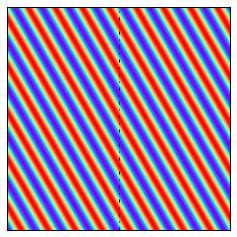

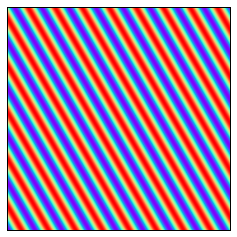

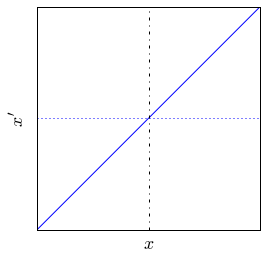

In [1]:
%pylab inline

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.pyplot import *

save_as_anim = True

k = 10.0
theta = np.pi/6
k_y = k*np.sin(theta)+0j
k_x = np.sqrt(k**2 - k_y**2)
x = y = np.linspace(-3.0, 3.0, 400)
X, Y = np.meshgrid(x, y)

s_x = 1.0#/(2.0)#+0.5j)
#s_y = 1.0/(2.0+0.0j)
#X = (X<=0.0)*X + (X>0.0)*(s_x*X)
#Y = (X<=0.0)*Y + (X>0.0)*(s_y*Y)

a = 3.0    #slab thickness
X = (X<=0.0)*X + (X>0.0)*(X<=a)*(s_x*X) + (X>a)*(X-a+s_x*a)

Z = np.real(np.exp(-1j*(k_x*X + k_y*Y)))

#figsize(6, 6)

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.rainbow,
                origin='lower', extent=[-3,3,-3,3],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

vls = '-.'
vlcol = 'k'

plt.axvline(0, ls=vls, color=vlcol)
plt.axvline(a, ls=vls, color=vlcol)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'test')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

file_name = os.path.join(dir_name, 'TrOp'+file_ext)
savefig(file_name)

show()

if save_as_anim:
    n_pt = 25
    def animate_E(i):
        phi_i = float(i)*2.0*np.pi/n_pt
        Z = np.real(np.exp(1j*phi_i-1j*(k_x*X + k_y*Y)))
        fig = plt.imshow(Z, interpolation='bilinear', cmap=cm.rainbow, extent=[-3,3,-3,3],
                          origin='lower', vmax=abs(Z).max(), vmin=-abs(Z).max())
        #plt.axvline(0, ls=vls, color=vlcol)
        #plt.axvline(a, ls=vls, color=vlcol)
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
        return fig

    fig = plt.figure()
    anim = animation.FuncAnimation(fig, animate_E, frames=n_pt, interval=1, repeat=True)
    file_ext = '.gif'
    file_name = os.path.join(dir_name, 'e-2d'+file_ext)
    anim.save(file_name, writer="imagemagick", fps=15, dpi=200)
    plt.show()



figsize(4, 4)

x_p = (x<=0.0)*x + (x>0.0)*(x<=a)*(s_x*x) + (x>a)*(x-a+s_x*a)
plot(x, np.real(x_p), 'b')
plot(x, np.imag(x_p), 'b:')
#gca().get_xaxis().set_visible(False)
#gca().get_yaxis().set_visible(False)
tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelleft='off') 

plt.axvline(0, ls=vls, color=vlcol)
plt.axvline(a, ls=vls, color=vlcol)
plt.xlabel('$x$')
plt.ylabel("$x'$")

plt.gca().set_xlim([-3.0, 3.0])
plt.gca().set_ylim([-3.0, 3.0])

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

file_ext = '.png'
file_name = os.path.join(dir_name, 'x-xp'+file_ext)
plt.savefig(file_name)

plt.show()




### planar perfect glass (-d/2...d/2)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


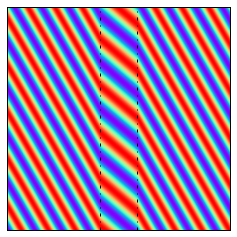

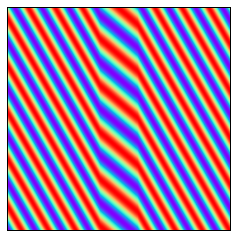

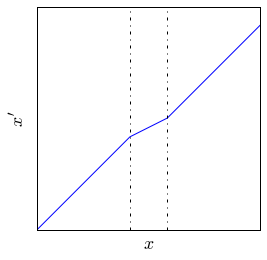

In [6]:
%pylab inline

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.pyplot import *

save_as_anim = True

k = 10.0
theta = np.pi/6
k_y = k*np.sin(theta)+0j
k_x = np.sqrt(k**2 - k_y**2)
x = y = np.linspace(-3.0, 3.0, 400)
X, Y = np.meshgrid(x, y)

s_x = 1.0/(2.0)#+0.5j)
#s_y = 1.0/(2.0+0.0j)
#X = (X<=0.0)*X + (X>0.0)*(s_x*X)
#Y = (X<=0.0)*Y + (X>0.0)*(s_y*Y)

a = 1.0    #slab thickness
X = (X<=-a/2)*X + (X>-a/2)*(X<=a/2)*(s_x*(X+a/2)-a/2) + (X>a/2)*(X-a/2+s_x*a-a/2)

Z = np.real(np.exp(-1j*(k_x*X + k_y*Y)))

#figsize(6, 6)

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.rainbow,
                origin='lower', extent=[-3,3,-3,3],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

vls = '-.'
vlcol='k'

plt.axvline(-a/2, ls=vls, color=vlcol)
plt.axvline(a/2, ls=vls, color=vlcol)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'test')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

file_name = os.path.join(dir_name, 'TrOp'+file_ext)
savefig(file_name)

show()

if save_as_anim:
    n_pt = 25
    def animate_E(i):
        phi_i = float(i)*2.0*np.pi/n_pt
        Z = np.real(np.exp(1j*phi_i-1j*(k_x*X + k_y*Y)))
        fig = plt.imshow(Z, interpolation='bilinear', cmap=cm.rainbow, 
                          origin='lower', vmax=abs(Z).max(), vmin=-abs(Z).max())
        #plt.axvline(-a/2, ls=vls, color=vlcol)
        #plt.axvline(a/2, ls=vls, color=vlcol)
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
        return fig

    fig = plt.figure()
    anim = animation.FuncAnimation(fig, animate_E, frames=n_pt, interval=1, repeat=True)
    file_ext = '.gif'
    file_name = os.path.join(dir_name, 'e-2d'+file_ext)
    anim.save(file_name, writer="imagemagick", fps=15, dpi=200)
    plt.show()


figsize(4, 4)

x_p = (x<=-a/2)*x + (x>-a/2)*(x<=a/2)*(s_x*(x+a/2)-a/2) + (x>a/2)*(x-a/2+s_x*a-a/2)
plot(x, x_p)
#gca().get_xaxis().set_visible(False)
#gca().get_yaxis().set_visible(False)
tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelleft='off') 

plt.axvline(-a/2, ls=vls, color=vlcol)
plt.axvline(a/2, ls=vls, color=vlcol)
plt.xlabel('$x$')
plt.ylabel("$x'$")

plt.gca().set_xlim([-3.0, 3.0])
plt.gca().set_ylim([-3.0, 3.0])

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

file_ext = '.png'
file_name = os.path.join(dir_name, 'x-xp'+file_ext)
plt.savefig(file_name)

plt.show()




### planar perfect glass (-d/2...0...d/2) no phase change

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


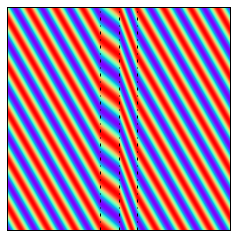

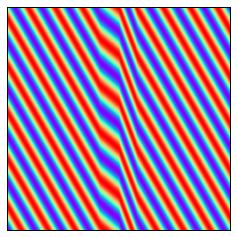

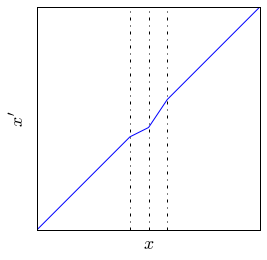

In [9]:
%pylab inline

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.pyplot import *

save_as_anim = True

k = 10.0
theta = np.pi/6
k_y = k*np.sin(theta)+0j
k_x = np.sqrt(k**2 - k_y**2)
x = y = np.linspace(-3.0, 3.0, 400)
X, Y = np.meshgrid(x, y)

s_x = 1.0/(2.0)#+0.5j)
#s_y = 1.0/(2.0+0.0j)
#X = (X<=0.0)*X + (X>0.0)*(s_x*X)
#Y = (X<=0.0)*Y + (X>0.0)*(s_y*Y)

a = 1.0    #slab thickness
X = (X<=-a/2)*X + (X>-a/2)*(X<=0)*(s_x*(X+a/2)-a/2) + (X>0)*(X<=a/2)*((2-s_x)*(X-a/2)+a/2) + (X>a/2)*X

Z = np.real(np.exp(-1j*(k_x*X + k_y*Y)))

#figsize(6, 6)

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.rainbow,
                origin='lower', extent=[-3,3,-3,3],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

vls = '-.'
vlcol = 'k'

plt.axvline(-a/2, ls=vls, color=vlcol)
plt.axvline(0, ls=vls, color=vlcol)
plt.axvline(a/2, ls=vls, color=vlcol)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'test')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

file_name = os.path.join(dir_name, 'TrOp'+file_ext)
savefig(file_name)

show()

if save_as_anim:
    n_pt = 25
    def animate_E(i):
        phi_i = float(i)*2.0*np.pi/n_pt
        Z = np.real(np.exp(1j*phi_i-1j*(k_x*X + k_y*Y)))
        fig = plt.imshow(Z, interpolation='bilinear', cmap=cm.rainbow, 
                          origin='lower', vmax=abs(Z).max(), vmin=-abs(Z).max())
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
        #plt.axvline(-a/2, ls=vls, color=vlcol)
        #plt.axvline(0, ls=vls, color=vlcol)
        #plt.axvline(a/2, ls=vls, color=vlcol)
        return fig

    fig = plt.figure()
    anim = animation.FuncAnimation(fig, animate_E, frames=n_pt, interval=1, repeat=True)
    file_ext = '.gif'
    file_name = os.path.join(dir_name, 'e-2d'+file_ext)
    anim.save(file_name, writer="imagemagick", fps=15, dpi=200)
    plt.show()


figsize(4, 4)

x_p = (x<=-a/2)*x + (x>-a/2)*(x<=0)*(s_x*(x+a/2)-a/2) + (x>0)*(x<=a/2)*((2-s_x)*(x-a/2)+a/2) + (x>a/2)*x
plot(x, x_p)
#gca().get_xaxis().set_visible(False)
#gca().get_yaxis().set_visible(False)
tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelleft='off') 

plt.axvline(-a/2, ls=vls, color=vlcol)
plt.axvline(0, ls=vls, color=vlcol)
plt.axvline(a/2, ls=vls, color=vlcol)
plt.xlabel('$x$')
plt.ylabel("$x'$")

plt.gca().set_xlim([-3.0, 3.0])
plt.gca().set_ylim([-3.0, 3.0])

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

file_ext = '.png'
file_name = os.path.join(dir_name, 'x-xp'+file_ext)
plt.savefig(file_name)

plt.show()


### testing perfect glass

In [13]:

from Electromagnetics.VectorCalculus import *

from sympy import Symbol, symbols, latex, atan, eye, Heaviside, sqrt, diag, Matrix, exp, I
from IPython.display import display, Math

from Electromagnetics.Misc import SymMatrixdoit, SymMatrixSimplify, SymMatrixsubs

x, y, z, t = symbols('x y z t')
Ex1 = Symbol('E_{x1}')
Ey1 = Symbol('E_{y1}')
Ez1 = Symbol('E_{z1}')
Ex2 = Symbol('E_{x2}')
Ey2 = Symbol('E_{y2}')
Ez2 = Symbol('E_{z2}')

k0, k0x, k0y, k0z = symbols('k_0 k_{0x} k_{0y} k_{0z}')
k1, k1x, k1y, k1z = symbols('k_1 k_{1x} k_{1y} k_{1z}')
k2, k2x, k2y, k2z = symbols('k_2 k_{2x} k_{2y} k_{2z}')
omega = Symbol('\\omega')

eps_0, mu_0, eta_0 = symbols('\\epsilon_0 \\mu_0 \\eta_0')

isTM = True
isTE = False
assert not(isTE and isTM)

k1_vec = Matrix([k1x, k1y, k1z])
k2_vec = Matrix([k2x, k2y, k2z])

if isTM or isTE:
    k1_vec = k1_vec.subs([(k1z, 0)])
    k2_vec = k2_vec.subs([(k2z, 0)])
    
r_vec = [x, y, z]

E1 = Matrix([[Ex1, Ey1, Ez1]])*exp(-I*dotproduct(k1_vec, r_vec))
E2 = Matrix([[Ex2, Ey2, Ez2]])*exp(-I*dotproduct(k2_vec, r_vec))

if isTM:
    SymMatrixsubs(E1, ([(Ex1, 0), (Ey1, 0)]))
    SymMatrixsubs(E2, ([(Ex2, 0), (Ey2, 0)]))
elif isTE:
    SymMatrixsubs(E1, ([(Ez1, 0)]))
    SymMatrixsubs(E2, ([(Ez2, 0)]))

display(Math('E_1 = ' + latex(E1)))
display(Math('E_2 = ' + latex(E2)))

s_x = symbols('s_x')
mu_r_2_mat = diag(s_x, 1/s_x, 1/s_x)
eps_r_2_mat = diag(s_x, 1/s_x, 1/s_x)

H1 = -1/(I*omega*mu_0)*curl_r(E1)
H2 = -1/(I*omega*mu_0)*mu_r_2_mat**(-1)*curl_r(E2).T
H2 = H2.T

SymMatrixdoit(H1)
SymMatrixSimplify(H1)
SymMatrixdoit(H2)
SymMatrixSimplify(H2)

display(Math('H_1 = ' + latex(H1.T)))
display(Math('H_2 = ' + latex(H2.T)))

a_x = Matrix([1, 0, 0])

E1_T = crossproduct(a_x, E1.subs(x, 0))
E2_T = crossproduct(a_x, E2.subs(x, 0))

H1_T = crossproduct(a_x, H1.subs(x, 0))
H2_T = crossproduct(a_x, H2.subs(x, 0))

display(Math('a_x \\times (E_1-E_2) = ' + latex(SymMatrixSimplify(E1_T-E2_T).T)))
display(Math('a_x \\times (H_1-H_2) = ' + latex(SymMatrixSimplify(H1_T-H2_T).T)))


Wave_EQ1 = curl_r(H1)-I*omega*eps_0*E1
SymMatrixdoit(Wave_EQ1)
SymMatrixSimplify(Wave_EQ1)
display(Math('Wave EQ_1 = ' + latex(Wave_EQ1.T)))

Wave_EQ2 = curl_r(H2).T - I*omega*eps_0*eps_r_2_mat*E2.T
Wave_EQ2 = Wave_EQ2.T
SymMatrixdoit(Wave_EQ2)
SymMatrixSimplify(Wave_EQ2)
display(Math('Wave EQ_2 = ' + latex(Wave_EQ2.T)))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [2]:

from Electromagnetics.VectorCalculus import *

from sympy import Symbol, symbols, latex, atan, eye, Heaviside, sqrt, diag, Matrix, exp, I, Wild, solve
from IPython.display import display, Math

from Electromagnetics.Misc import SymMatrixdoit, SymMatrixSimplify, SymMatrixsubs

showlatex = True

x, y, z, t = symbols('x y z t')
Exi = Symbol('E_{xi}')
Eyi = Symbol('E_{yi}')
Ezi = Symbol('E_{zi}')
Exr = Symbol('E_{xr}')
Eyr = Symbol('E_{yr}')
Ezr = Symbol('E_{zr}')
Ext = Symbol('E_{xt}')
Eyt = Symbol('E_{yt}')
Ezt = Symbol('E_{zt}')

k0, k0x, k0y, k0z = symbols('k_0 k_{0x} k_{0y} k_{0z}')
ki, kix, kiy, kiz = symbols('k_i k_{ix} k_{iy} k_{iz}')
kr, krx, kry, krz = symbols('k_r k_{rx} k_{ry} k_{rz}')
kt, ktx, kty, ktz = symbols('k_t k_{tx} k_{ty} k_{tz}')
omega = Symbol('\\omega')

eps_0, mu_0, eta_0 = symbols('\\epsilon_0 \\mu_0 \\eta_0')

isTM = True
isTE = False
assert not(isTE and isTM)

ki_vec = Matrix([kix, kiy, kiz])
kr_vec = Matrix([krx, kry, krz])
kt_vec = Matrix([ktx, kty, ktz])

if isTM or isTE:
    ki_vec = ki_vec.subs([(kiz, 0)])
    kr_vec = kr_vec.subs([(krz, 0)])
    kt_vec = kt_vec.subs([(ktz, 0)])
    
r_vec = [x, y, z]

Ei = Matrix([[Exi, Eyi, Ezi]])*exp(-I*dotproduct(ki_vec, r_vec))
Er = Matrix([[Exr, Eyr, Ezr]])*exp(-I*dotproduct(kr_vec, r_vec))
Et = Matrix([[Ext, Eyt, Ezt]])*exp(-I*dotproduct(kt_vec, r_vec))

if isTM:
    SymMatrixsubs(Ei, ([(Exi, 0), (Eyi, 0)]))
    SymMatrixsubs(Er, ([(Exr, 0), (Eyr, 0)]))
    SymMatrixsubs(Et, ([(Ext, 0), (Eyt, 0)]))
elif isTE:
    SymMatrixsubs(Ei, ([(Ezi, 0)]))
    SymMatrixsubs(Er, ([(Ezr, 0)]))
    SymMatrixsubs(Et, ([(Ezt, 0)]))

display(Math('E_i = ' + latex(Ei)))
display(Math('E_r = ' + latex(Er)))
display(Math('E_t = ' + latex(Et)))

if showlatex:
    print('E_i:', latex(Ei))
    print('E_r:', latex(Er))
    print('E_t:', latex(Et))

s_xx, s_yy, s_zz = symbols('\\alpha_{xx} \\alpha_{yy} \\alpha_{zz}')
eps_r_2_mat = diag(s_xx, s_yy, s_zz)
mu_r_2_mat = diag(s_xx, s_yy, s_zz)

if showlatex:
    print('eps_r:', latex(eps_r_2_mat))
    print('mu_r:', latex(mu_r_2_mat))


Hi = -1/(I*omega*mu_0)*curl_r(Ei)
Hr = -1/(I*omega*mu_0)*curl_r(Er)
Ht = -1/(I*omega*mu_0)*mu_r_2_mat**(-1)*curl_r(Et).T
Ht = Ht.T

SymMatrixdoit(Hi)
SymMatrixSimplify(Hi)
SymMatrixdoit(Hr)
SymMatrixSimplify(Hr)
SymMatrixdoit(Ht)
SymMatrixSimplify(Ht)

display(Math('H_i = ' + latex(Hi.T)))
display(Math('H_r = ' + latex(Hr.T)))
display(Math('H_t = ' + latex(Ht.T)))

if showlatex:
    print('H_i:', latex(Hi))
    print('H_r:', latex(Hr))
    print('H_t:', latex(Ht))

a_x = Matrix([1, 0, 0])

Ei_T = crossproduct(a_x, Ei.subs(x, 0))
Er_T = crossproduct(a_x, Er.subs(x, 0))
Et_T = crossproduct(a_x, Et.subs(x, 0))

Hi_T = crossproduct(a_x, Hi.subs(x, 0))
Hr_T = crossproduct(a_x, Hr.subs(x, 0))
Ht_T = crossproduct(a_x, Ht.subs(x, 0))

display(Math('a_x \\times (E_i+E_r-E_t) = ' + latex(SymMatrixSimplify(Ei_T+Er_T-Et_T).T)))
display(Math('a_x \\times (H_i+H_r-H_t) = ' + latex(SymMatrixSimplify(Hi_T+Hr_T-Ht_T).T)))


E_cond = SymMatrixSimplify(Ei_T+Er_T-Et_T)[1].subs(y, 0).simplify()
H_cond = SymMatrixSimplify(Hi_T+Hr_T-Ht_T)[2].subs(y, 0).simplify()

display(Math('E condition = ' + latex(E_cond)))
display(Math('H condition = ' + latex(H_cond)))

if showlatex:
    print('a_x \\times (E_i+E_r-E_t) = ', latex(E_cond))
    print('a_x \\times (H_i+H_r-H_t) = ', latex(H_cond))

Wave_EQi = curl_r(Hi)-I*omega*eps_0*Ei
SymMatrixdoit(Wave_EQi)
SymMatrixSimplify(Wave_EQi)
display(Math('Wave EQ_i = ' + latex(Wave_EQi.T)))

Wave_EQr = curl_r(Hr)-I*omega*eps_0*Er
SymMatrixdoit(Wave_EQr)
SymMatrixSimplify(Wave_EQr)
display(Math('Wave EQ_r = ' + latex(Wave_EQr.T)))

Wave_EQt = curl_r(Ht).T - I*omega*eps_0*eps_r_2_mat*Et.T
Wave_EQt = Wave_EQt.T
SymMatrixdoit(Wave_EQt)
SymMatrixSimplify(Wave_EQt)
display(Math('Wave EQ_t = ' + latex(Wave_EQt.T)))

if showlatex:
    print('Wave_EQi.T = ', latex(Wave_EQi.T))
    print('Wave_EQr.T = ', latex(Wave_EQr.T))
    print('Wave_EQt.T = ', latex(Wave_EQt.T))


A_ = Wild('A_')
B_ = Wild('B_')
p_i = Wave_EQi[2].match(A_*(B_+kiy**2))[B_]
p_r = Wave_EQr[2].match(A_*(B_+kry**2))[B_]
p_t = Wave_EQt[2].match(A_*(B_+s_yy*kty**2))[B_]/s_yy
display(Math('p_i = ' + latex(p_i)))
display(Math('p_r = ' + latex(p_r)))
display(Math('p_t = ' + latex(p_t)))

krx_sub = solve(p_r-p_i, krx)[0].simplify()
display(Math('k_{rx} = ' + latex(krx_sub)))
ktx_sub = solve(p_t-p_i, ktx)[1].simplify()
display(Math('k_{tx} = ' + latex(ktx_sub)))

if showlatex:
    print('krx_sub = ', latex(krx_sub))
    print('ktx_sub = ', latex(ktx_sub))


ref_tr = solve([E_cond, H_cond], [Ezr, Ezt])
Ezr_sub = ref_tr[Ezr]
Ezt_sub = ref_tr[Ezt]

display(Math(latex(Ezr) + ' = ' + latex(Ezr_sub)))
display(Math(latex(Ezt) + ' = ' + latex(Ezt_sub)))

T = (Ezt_sub/Ezi).subs([(krx, krx_sub), (ktx, ktx_sub)]).simplify()
R = (Ezr_sub/Ezi).subs([(krx, krx_sub), (ktx, ktx_sub)]).simplify()

display(Math('T = ' + latex(T)))
display(Math('R = ' + latex(R)))
if showlatex:
    print('T:', latex(T))
    print('R:', latex(R))

s = symbols('s')

T = T.subs([(s_xx, s), (s_yy, 1/s), (s_zz, 1/s)]).simplify()
R = R.subs([(s_xx, s), (s_yy, 1/s), (s_zz, 1/s)]).simplify()
display(Math('T = ' + latex(T)))
display(Math('R = ' + latex(R)))
if showlatex:
    print('T:', latex(T))
    print('R:', latex(R))

ktx_sub = ktx_sub.subs([(s_xx, s), (s_yy, 1/s), (s_zz, 1/s)]).simplify()
display(Math('k_{tx} = ' + latex(ktx_sub)))
if showlatex:
    print('ktx:', latex(ktx_sub))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

E_i: \left[\begin{matrix}0 & 0 & E_{{zi}} e^{- i \left(k_{{ix}} x + k_{{iy}} y\right)}\end{matrix}\right]
E_r: \left[\begin{matrix}0 & 0 & E_{{zr}} e^{- i \left(k_{{rx}} x + k_{{ry}} y\right)}\end{matrix}\right]
E_t: \left[\begin{matrix}0 & 0 & E_{{zt}} e^{- i \left(k_{{tx}} x + k_{{ty}} y\right)}\end{matrix}\right]
eps_r: \left[\begin{matrix}\alpha_{{xx}} & 0 & 0\\0 & \alpha_{{yy}} & 0\\0 & 0 & \alpha_{{zz}}\end{matrix}\right]
mu_r: \left[\begin{matrix}\alpha_{{xx}} & 0 & 0\\0 & \alpha_{{yy}} & 0\\0 & 0 & \alpha_{{zz}}\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

H_i: \left[\begin{matrix}\frac{E_{{zi}} k_{{iy}}}{\mu_{0} \omega} e^{- i \left(k_{{ix}} x + k_{{iy}} y\right)} & - \frac{E_{{zi}} k_{{ix}}}{\mu_{0} \omega} e^{- i \left(k_{{ix}} x + k_{{iy}} y\right)} & 0\end{matrix}\right]
H_r: \left[\begin{matrix}\frac{E_{{zr}} k_{{ry}}}{\mu_{0} \omega} e^{- i \left(k_{{rx}} x + k_{{ry}} y\right)} & - \frac{E_{{zr}} k_{{rx}}}{\mu_{0} \omega} e^{- i \left(k_{{rx}} x + k_{{ry}} y\right)} & 0\end{matrix}\right]
H_t: \left[\begin{matrix}\frac{E_{{zt}} k_{{ty}}}{\alpha_{{xx}} \mu_{0} \omega} e^{- i \left(k_{{tx}} x + k_{{ty}} y\right)} & - \frac{E_{{zt}} k_{{tx}}}{\alpha_{{yy}} \mu_{0} \omega} e^{- i \left(k_{{tx}} x + k_{{ty}} y\right)} & 0\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

a_x \times (E_i+E_r-E_t) =  - E_{{zi}} - E_{{zr}} + E_{{zt}}
a_x \times (H_i+H_r-H_t) =  \frac{1}{\alpha_{{yy}} \mu_{0} \omega} \left(E_{{zt}} k_{{tx}} - \alpha_{{yy}} \left(E_{{zi}} k_{{ix}} + E_{{zr}} k_{{rx}}\right)\right)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Wave_EQi.T =  \left[\begin{matrix}0\\0\\\frac{i E_{{zi}}}{\mu_{0} \omega} \left(- \epsilon_{0} \mu_{0} \omega^{2} + k_{{ix}}^{2} + k_{{iy}}^{2}\right) e^{- i \left(k_{{ix}} x + k_{{iy}} y\right)}\end{matrix}\right]
Wave_EQr.T =  \left[\begin{matrix}0\\0\\\frac{i E_{{zr}}}{\mu_{0} \omega} \left(- \epsilon_{0} \mu_{0} \omega^{2} + k_{{rx}}^{2} + k_{{ry}}^{2}\right) e^{- i \left(k_{{rx}} x + k_{{ry}} y\right)}\end{matrix}\right]
Wave_EQt.T =  \left[\begin{matrix}0\\0\\\frac{i E_{{zt}}}{\alpha_{{xx}} \alpha_{{yy}} \mu_{0} \omega} \left(- \alpha_{{xx}} \alpha_{{yy}} \alpha_{{zz}} \epsilon_{0} \mu_{0} \omega^{2} + \alpha_{{xx}} k_{{tx}}^{2} + \alpha_{{yy}} k_{{ty}}^{2}\right) e^{- i \left(k_{{tx}} x + k_{{ty}} y\right)}\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

krx_sub =  - k_{{ix}}
ktx_sub =  \sqrt{\frac{\alpha_{{yy}}}{\alpha_{{xx}}} \left(\alpha_{{xx}} \alpha_{{zz}} \epsilon_{0} \mu_{0} \omega^{2} - \epsilon_{0} \mu_{0} \omega^{2} + k_{{ix}}^{2}\right)}


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

T: \frac{2 \alpha_{{yy}} k_{{ix}}}{\alpha_{{yy}} k_{{ix}} + \sqrt{\frac{\alpha_{{yy}}}{\alpha_{{xx}}} \left(\alpha_{{xx}} \alpha_{{zz}} \epsilon_{0} \mu_{0} \omega^{2} - \epsilon_{0} \mu_{0} \omega^{2} + k_{{ix}}^{2}\right)}}
R: \frac{\alpha_{{yy}} k_{{ix}} - \sqrt{\frac{\alpha_{{yy}}}{\alpha_{{xx}}} \left(\alpha_{{xx}} \alpha_{{zz}} \epsilon_{0} \mu_{0} \omega^{2} - \epsilon_{0} \mu_{0} \omega^{2} + k_{{ix}}^{2}\right)}}{\alpha_{{yy}} k_{{ix}} + \sqrt{\frac{\alpha_{{yy}}}{\alpha_{{xx}}} \left(\alpha_{{xx}} \alpha_{{zz}} \epsilon_{0} \mu_{0} \omega^{2} - \epsilon_{0} \mu_{0} \omega^{2} + k_{{ix}}^{2}\right)}}


<IPython.core.display.Math object>

<IPython.core.display.Math object>

T: \frac{2 k_{{ix}}}{k_{{ix}} + s \sqrt{\frac{k_{{ix}}^{2}}{s^{2}}}}
R: \frac{k_{{ix}} - s \sqrt{\frac{k_{{ix}}^{2}}{s^{2}}}}{k_{{ix}} + s \sqrt{\frac{k_{{ix}}^{2}}{s^{2}}}}


<IPython.core.display.Math object>

ktx: \sqrt{\frac{k_{{ix}}^{2}}{s^{2}}}


#### second interface

In [33]:

from Electromagnetics.VectorCalculus import *

from sympy import Symbol, symbols, latex, atan, eye, Heaviside, sqrt, diag, Matrix, exp, I, Wild, solve
from IPython.display import display, Math

from Electromagnetics.Misc import SymMatrixdoit, SymMatrixSimplify, SymMatrixsubs

showlatex = True

x, y, z, t = symbols('x y z t')
Exi = Symbol('E_{xi}')
Eyi = Symbol('E_{yi}')
Ezi = Symbol('E_{zi}')
Exr = Symbol('E_{xr}')
Eyr = Symbol('E_{yr}')
Ezr = Symbol('E_{zr}')
Ext = Symbol('E_{xt}')
Eyt = Symbol('E_{yt}')
Ezt = Symbol('E_{zt}')

k0, k0x, k0y, k0z = symbols('k_0 k_{0x} k_{0y} k_{0z}')
ki, kix, kiy, kiz = symbols('k_i k_{ix} k_{iy} k_{iz}')
kr, krx, kry, krz = symbols('k_r k_{rx} k_{ry} k_{rz}')
kt, ktx, kty, ktz = symbols('k_t k_{tx} k_{ty} k_{tz}')
omega = Symbol('\\omega')

eps_0, mu_0, eta_0 = symbols('\\epsilon_0 \\mu_0 \\eta_0')

isTM = True
isTE = False
assert not(isTE and isTM)

ki_vec = Matrix([kix, kiy, kiz])
kr_vec = Matrix([krx, kry, krz])
kt_vec = Matrix([ktx, kty, ktz])

if isTM or isTE:
    ki_vec = ki_vec.subs([(kiz, 0)])
    kr_vec = kr_vec.subs([(krz, 0)])
    kt_vec = kt_vec.subs([(ktz, 0)])
    
r_vec = [x, y, z]

Ei = Matrix([[Exi, Eyi, Ezi]])*exp(-I*dotproduct(ki_vec, r_vec))
Er = Matrix([[Exr, Eyr, Ezr]])*exp(-I*dotproduct(kr_vec, r_vec))
Et = Matrix([[Ext, Eyt, Ezt]])*exp(-I*dotproduct(kt_vec, r_vec))

if isTM:
    SymMatrixsubs(Ei, ([(Exi, 0), (Eyi, 0)]))
    SymMatrixsubs(Er, ([(Exr, 0), (Eyr, 0)]))
    SymMatrixsubs(Et, ([(Ext, 0), (Eyt, 0)]))
elif isTE:
    SymMatrixsubs(Ei, ([(Ezi, 0)]))
    SymMatrixsubs(Er, ([(Ezr, 0)]))
    SymMatrixsubs(Et, ([(Ezt, 0)]))

display(Math('E_i = ' + latex(Ei)))
display(Math('E_r = ' + latex(Er)))
display(Math('E_t = ' + latex(Et)))

if showlatex:
    print('E_i:', latex(Ei))
    print('E_r:', latex(Er))
    print('E_t:', latex(Et))

s_xx, s_yy, s_zz = symbols('\\alpha_{xx} \\alpha_{yy} \\alpha_{zz}')
eps_r_1_mat = diag(s_xx, s_yy, s_zz)
mu_r_1_mat = diag(s_xx, s_yy, s_zz)

if showlatex:
    print('eps_r:', latex(eps_r_1_mat))
    print('mu_r:', latex(mu_r_1_mat))


Hi = -1/(I*omega*mu_0)*mu_r_1_mat**(-1)*curl_r(Ei).T
Hi = Hi.T
Hr = -1/(I*omega*mu_0)*mu_r_1_mat**(-1)*curl_r(Er).T
Hr = Hr.T
Ht = -1/(I*omega*mu_0)*curl_r(Et)

SymMatrixdoit(Hi)
SymMatrixSimplify(Hi)
SymMatrixdoit(Hr)
SymMatrixSimplify(Hr)
SymMatrixdoit(Ht)
SymMatrixSimplify(Ht)

display(Math('H_i = ' + latex(Hi.T)))
display(Math('H_r = ' + latex(Hr.T)))
display(Math('H_t = ' + latex(Ht.T)))

if showlatex:
    print('H_i:', latex(Hi))
    print('H_r:', latex(Hr))
    print('H_t:', latex(Ht))

a_x = Matrix([1, 0, 0])

Ei_T = crossproduct(a_x, Ei.subs(x, 0))
Er_T = crossproduct(a_x, Er.subs(x, 0))
Et_T = crossproduct(a_x, Et.subs(x, 0))

Hi_T = crossproduct(a_x, Hi.subs(x, 0))
Hr_T = crossproduct(a_x, Hr.subs(x, 0))
Ht_T = crossproduct(a_x, Ht.subs(x, 0))

display(Math('a_x \\times (E_i+E_r-E_t) = ' + latex(SymMatrixSimplify(Ei_T+Er_T-Et_T).T)))
display(Math('a_x \\times (H_i+H_r-H_t) = ' + latex(SymMatrixSimplify(Hi_T+Hr_T-Ht_T).T)))


E_cond = SymMatrixSimplify(Ei_T+Er_T-Et_T)[1].subs(y, 0).simplify()
H_cond = SymMatrixSimplify(Hi_T+Hr_T-Ht_T)[2].subs(y, 0).simplify()

display(Math('E condition = ' + latex(E_cond)))
display(Math('H condition = ' + latex(H_cond)))

if showlatex:
    print('a_x \\times (E_i+E_r-E_t) = ', latex(E_cond))
    print('a_x \\times (H_i+H_r-H_t) = ', latex(H_cond))

Wave_EQi = curl_r(Hi).T-I*omega*eps_0*eps_r_1_mat*Ei.T
Wave_EQi = Wave_EQi.T
SymMatrixdoit(Wave_EQi)
SymMatrixSimplify(Wave_EQi)
display(Math('Wave EQ_i = ' + latex(Wave_EQi.T)))

Wave_EQr = curl_r(Hr).T-I*omega*eps_0*eps_r_1_mat*Er.T
Wave_EQr = Wave_EQr.T
SymMatrixdoit(Wave_EQr)
SymMatrixSimplify(Wave_EQr)
display(Math('Wave EQ_r = ' + latex(Wave_EQr.T)))

Wave_EQt = curl_r(Ht) - I*omega*eps_0*Et
SymMatrixdoit(Wave_EQt)
SymMatrixSimplify(Wave_EQt)
display(Math('Wave EQ_t = ' + latex(Wave_EQt.T)))

if showlatex:
    print('Wave_EQi.T = ', latex(Wave_EQi.T))
    print('Wave_EQr.T = ', latex(Wave_EQr.T))
    print('Wave_EQt.T = ', latex(Wave_EQt.T))


A_ = Wild('A_')
B_ = Wild('B_')
p_i = Wave_EQi[2].match(A_*(B_+s_yy*kiy**2))[B_]/s_yy
p_r = Wave_EQr[2].match(A_*(B_+s_yy*kry**2))[B_]/s_yy
p_t = Wave_EQt[2].match(A_*(B_+kty**2))[B_]
display(Math('p_i = ' + latex(p_i)))
display(Math('p_r = ' + latex(p_r)))
display(Math('p_t = ' + latex(p_t)))

krx_sub = solve(p_r-p_i, krx)[0].simplify()
display(Math('k_{rx} = ' + latex(krx_sub)))
ktx_sub = solve(p_t-p_i, ktx)[1].simplify()
display(Math('k_{tx} = ' + latex(ktx_sub)))

if showlatex:
    print('krx_sub = ', latex(krx_sub))
    print('ktx_sub = ', latex(ktx_sub))


ref_tr = solve([E_cond, H_cond], [Ezr, Ezt])
Ezr_sub = ref_tr[Ezr]
Ezt_sub = ref_tr[Ezt]

display(Math(latex(Ezr) + ' = ' + latex(Ezr_sub)))
display(Math(latex(Ezt) + ' = ' + latex(Ezt_sub)))

T = (Ezt_sub/Ezi).subs([(krx, krx_sub), (ktx, ktx_sub)]).simplify()
R = (Ezr_sub/Ezi).subs([(krx, krx_sub), (ktx, ktx_sub)]).simplify()

display(Math('T = ' + latex(T)))
display(Math('R = ' + latex(R)))
if showlatex:
    print('T:', latex(T))
    print('R:', latex(R))

s = symbols('s')

T = T.subs([(s_xx, s), (s_yy, 1/s), (s_zz, 1/s)]).simplify()
R = R.subs([(s_xx, s), (s_yy, 1/s), (s_zz, 1/s)]).simplify()
display(Math('T = ' + latex(T)))
display(Math('R = ' + latex(R)))
if showlatex:
    print('T:', latex(T))
    print('R:', latex(R))

ktx_sub = ktx_sub.subs([(s_xx, s), (s_yy, 1/s), (s_zz, 1/s)]).simplify()
display(Math('k_{tx} = ' + latex(ktx_sub)))
if showlatex:
    print('ktx:', latex(ktx_sub))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

E_i: \left[\begin{matrix}0 & 0 & E_{{zi}} e^{- i \left(k_{{ix}} x + k_{{iy}} y\right)}\end{matrix}\right]
E_r: \left[\begin{matrix}0 & 0 & E_{{zr}} e^{- i \left(k_{{rx}} x + k_{{ry}} y\right)}\end{matrix}\right]
E_t: \left[\begin{matrix}0 & 0 & E_{{zt}} e^{- i \left(k_{{tx}} x + k_{{ty}} y\right)}\end{matrix}\right]
eps_r: \left[\begin{matrix}\alpha_{{xx}} & 0 & 0\\0 & \alpha_{{yy}} & 0\\0 & 0 & \alpha_{{zz}}\end{matrix}\right]
mu_r: \left[\begin{matrix}\alpha_{{xx}} & 0 & 0\\0 & \alpha_{{yy}} & 0\\0 & 0 & \alpha_{{zz}}\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

H_i: \left[\begin{matrix}\frac{E_{{zi}} k_{{iy}}}{\alpha_{{xx}} \mu_{0} \omega} e^{- i \left(k_{{ix}} x + k_{{iy}} y\right)} & - \frac{E_{{zi}} k_{{ix}}}{\alpha_{{yy}} \mu_{0} \omega} e^{- i \left(k_{{ix}} x + k_{{iy}} y\right)} & 0\end{matrix}\right]
H_r: \left[\begin{matrix}\frac{E_{{zr}} k_{{ry}}}{\alpha_{{xx}} \mu_{0} \omega} e^{- i \left(k_{{rx}} x + k_{{ry}} y\right)} & - \frac{E_{{zr}} k_{{rx}}}{\alpha_{{yy}} \mu_{0} \omega} e^{- i \left(k_{{rx}} x + k_{{ry}} y\right)} & 0\end{matrix}\right]
H_t: \left[\begin{matrix}\frac{E_{{zt}} k_{{ty}}}{\mu_{0} \omega} e^{- i \left(k_{{tx}} x + k_{{ty}} y\right)} & - \frac{E_{{zt}} k_{{tx}}}{\mu_{0} \omega} e^{- i \left(k_{{tx}} x + k_{{ty}} y\right)} & 0\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

a_x \times (E_i+E_r-E_t) =  - E_{{zi}} - E_{{zr}} + E_{{zt}}
a_x \times (H_i+H_r-H_t) =  \frac{1}{\alpha_{{yy}} \mu_{0} \omega} \left(- E_{{zi}} k_{{ix}} - E_{{zr}} k_{{rx}} + E_{{zt}} \alpha_{{yy}} k_{{tx}}\right)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Wave_EQi.T =  \left[\begin{matrix}0\\0\\\frac{i E_{{zi}}}{\alpha_{{xx}} \alpha_{{yy}} \mu_{0} \omega} \left(- \alpha_{{xx}} \alpha_{{yy}} \alpha_{{zz}} \epsilon_{0} \mu_{0} \omega^{2} + \alpha_{{xx}} k_{{ix}}^{2} + \alpha_{{yy}} k_{{iy}}^{2}\right) e^{- i \left(k_{{ix}} x + k_{{iy}} y\right)}\end{matrix}\right]
Wave_EQr.T =  \left[\begin{matrix}0\\0\\\frac{i E_{{zr}}}{\alpha_{{xx}} \alpha_{{yy}} \mu_{0} \omega} \left(- \alpha_{{xx}} \alpha_{{yy}} \alpha_{{zz}} \epsilon_{0} \mu_{0} \omega^{2} + \alpha_{{xx}} k_{{rx}}^{2} + \alpha_{{yy}} k_{{ry}}^{2}\right) e^{- i \left(k_{{rx}} x + k_{{ry}} y\right)}\end{matrix}\right]
Wave_EQt.T =  \left[\begin{matrix}0\\0\\\frac{i E_{{zt}}}{\mu_{0} \omega} \left(- \epsilon_{0} \mu_{0} \omega^{2} + k_{{tx}}^{2} + k_{{ty}}^{2}\right) e^{- i \left(k_{{tx}} x + k_{{ty}} y\right)}\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

krx_sub =  - k_{{ix}}
ktx_sub =  \sqrt{\frac{1}{\alpha_{{yy}}} \left(\alpha_{{xx}} k_{{ix}}^{2} + \alpha_{{yy}} \epsilon_{0} \mu_{0} \omega^{2} \left(- \alpha_{{xx}} \alpha_{{zz}} + 1\right)\right)}


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

T: \frac{2 k_{{ix}}}{\alpha_{{yy}} \sqrt{\frac{1}{\alpha_{{yy}}} \left(\alpha_{{xx}} k_{{ix}}^{2} - \alpha_{{yy}} \epsilon_{0} \mu_{0} \omega^{2} \left(\alpha_{{xx}} \alpha_{{zz}} - 1\right)\right)} + k_{{ix}}}
R: \frac{- \alpha_{{yy}} \sqrt{\frac{1}{\alpha_{{yy}}} \left(\alpha_{{xx}} k_{{ix}}^{2} - \alpha_{{yy}} \epsilon_{0} \mu_{0} \omega^{2} \left(\alpha_{{xx}} \alpha_{{zz}} - 1\right)\right)} + k_{{ix}}}{\alpha_{{yy}} \sqrt{\frac{1}{\alpha_{{yy}}} \left(\alpha_{{xx}} k_{{ix}}^{2} - \alpha_{{yy}} \epsilon_{0} \mu_{0} \omega^{2} \left(\alpha_{{xx}} \alpha_{{zz}} - 1\right)\right)} + k_{{ix}}}


<IPython.core.display.Math object>

<IPython.core.display.Math object>

T: \frac{2 k_{{ix}} s}{k_{{ix}} s + \sqrt{k_{{ix}}^{2} s^{2}}}
R: \frac{k_{{ix}} s - \sqrt{k_{{ix}}^{2} s^{2}}}{k_{{ix}} s + \sqrt{k_{{ix}}^{2} s^{2}}}


<IPython.core.display.Math object>

ktx: \sqrt{k_{{ix}}^{2} s^{2}}


### cylindrical perfect glass

Populating the interactive namespace from numpy and matplotlib


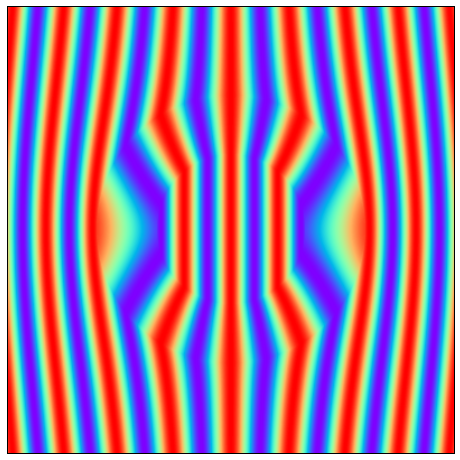

/usr/lib/python3/dist-packages/numpy/core/numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


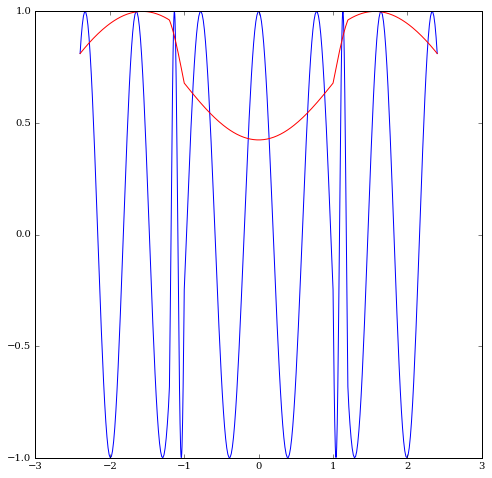

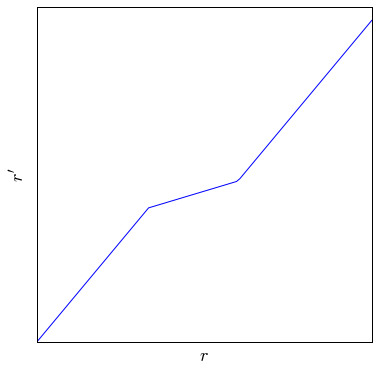

In [30]:
%pylab inline

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


k = 10.0
theta = 0.0*np.pi/6
k_x, k_y = k*np.cos(theta), k*np.sin(theta)
N = 400
xy_max = 3.0
x = y = np.linspace(-xy_max, xy_max, N)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Phi = np.angle(X+1j*Y)

s_r = 1.0/(4.0+0.0j)

r0, r1 = 1.0, 1.8
R = (R<=r0)*R + (R>r0)*(R<=r1)*(s_r*(R-r0) + r0) + (R>r1)*(R-r1+s_r*(r1-r0) + r0)

X = R*np.cos(Phi)
Y = R*np.sin(Phi)

Z = np.real(np.exp(-1j*(k_x*X + k_y*Y)))

figsize(8, 8)

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.rainbow,
                origin='lower', extent=[-xy_max,xy_max,-xy_max,xy_max],
                vmax=abs(Z).max(), vmin=-abs(Z).max())


gca().get_xaxis().set_visible(False)
gca().get_yaxis().set_visible(False)


import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'test')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

file_name = os.path.join(dir_name, 'TrOp'+file_ext)
savefig(file_name)

show()
#--------------


plot(X[int(N/2),:], Z[N-1,:], 'b')
plot(Y[:,int(N/2)], Z[:,N-1], 'r')
show()


#--------------
figsize(6, 6)

r = linspace(0.0, 3.0, 100)
r_p = (r<=r0)*r + (r>r0)*(r<=r1)*(s_r*(r-r0) + r0) + (r>r1)*(r-r1+s_r*(r1-r0) + r0)
plot(r, r_p)
#gca().get_xaxis().set_visible(False)
#gca().get_yaxis().set_visible(False)
tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelleft='off') 

xlabel('$r$')
ylabel("$r'$")

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)


file_name = os.path.join(dir_name, 'r-rp'+file_ext)
savefig(file_name)

show()


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


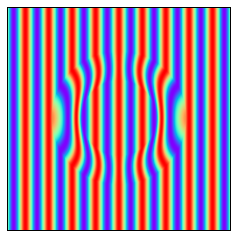

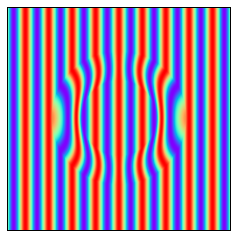

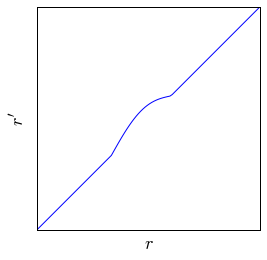

In [15]:
%pylab inline

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.pyplot import *

save_as_anim = True

k = 10.0
theta = 0.0*np.pi/6
k_x, k_y = k*np.cos(theta), k*np.sin(theta)
N = 400
xy_max = 3.0
x = y = np.linspace(-xy_max, xy_max, N)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Phi = np.angle(X+1j*Y)

#s_r = 1.0/(4.0+0.0j)

a = 0.2#+0.0j
r0, r1 = 1.0, 1.8
R = (R<=r0)*R + (R>r0)*(R<=r1)*(r0 + (R-r0) + a*np.sin(np.pi*(R-r0)/(r1-r0))) + (R>r1)*R

X = R*np.cos(Phi)
Y = R*np.sin(Phi)

Z = np.real(np.exp(-1j*(k_x*X + k_y*Y)))

figsize(4, 4)

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.rainbow,
                origin='lower', extent=[-xy_max,xy_max,-xy_max,xy_max],
                vmax=abs(Z).max(), vmin=-abs(Z).max())


gca().get_xaxis().set_visible(False)
gca().get_yaxis().set_visible(False)

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'test')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

file_name = os.path.join(dir_name, 'TrOp'+file_ext)
savefig(file_name)

plt.show()


if save_as_anim:
    n_pt = 25
    def animate_E(i):
        phi_i = float(i)*2.0*np.pi/n_pt
        Z = np.real(np.exp(1j*phi_i-1j*(k_x*X + k_y*Y)))
        fig = plt.imshow(Z, interpolation='bilinear', cmap=cm.rainbow, 
                          origin='lower', vmax=abs(Z).max(), vmin=-abs(Z).max())
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
        return fig

    fig = plt.figure()
    anim = animation.FuncAnimation(fig, animate_E, frames=n_pt, interval=1, repeat=True)
    file_ext = '.gif'
    file_name = os.path.join(dir_name, 'e-2d'+file_ext)
    anim.save(file_name, writer="imagemagick", fps=15, dpi=200)
    plt.show()


#--------------

"""
plot(X[N-1,:], Z[N-1,:], 'b')
plot(Y[:,N-1], Z[:,N-1], 'r')
show()
"""

#--------------
figsize(4, 4)

r = linspace(0.0, 3.0, 100)
r_p = (r<=r0)*r + (r>r0)*(r<=r1)*(r0 + (r-r0) + a*np.sin(np.pi*(r-r0)/(r1-r0))) + (r>r1)*r
plot(r, r_p)
#gca().get_xaxis().set_visible(False)
#gca().get_yaxis().set_visible(False)
tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelleft='off') 

xlabel('$r$')
ylabel("$r'$")

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

file_ext = '.png'
file_name = os.path.join(dir_name, 'r-rp'+file_ext)
savefig(file_name)

show()


In [11]:

from Electromagnetics.VectorCalculus import *

from sympy import symbols, latex, atan, eye, Heaviside, sqrt, Matrix, sin, pi
from IPython.display import display, Math

a, r0, r1 = symbols('a r_0 r_1', real=True)
b = 1

rho, phi, z = symbols('\\rho \\phi z', real=True, positive=True)
rho_p, phi_p, z_p = symbols("\\rho' \\phi' z'", real=True, positive=True)
f_rhop = rho + a*sin(b*pi*(rho-r0)/(r1-r0))
f_phip = phi
f_zp = z


vars_old = [rho, phi, z]
metric_old = eye(3); metric_old[1,1]=rho**2
vars_new = [rho_p, phi_p, z_p]
metric_new = eye(3); metric_new[1,1]=rho_p**2
funcs = [f_rhop, f_phip, f_zp]

jac = getJacobianMatrix(vars_old, vars_new, funcs)

display(Math(latex(jac)))

from Electromagnetics.Misc import SymMatrixdoit
from Electromagnetics.Misc import SymMatrixSimplify

SymMatrixdoit(jac)
display(Math(latex(jac)))

print('metric old:')
display(Math(latex(metric_old)))

print('metric new:')
display(Math(latex(metric_new)))

eps_old = eye(3)

#G_mat = (jac*metric_old**-1*jac.T).inv()
#eps_new = jac*metric_old**-1*jac.T/jac.det() * (sqrt(G_mat.det())/sqrt(metric_new.det()))
#eps_new = jac*eps_old*jac.T/jac.det()

h_old = Matrix([[sqrt(metric_old[i,j]) for i in range(metric_old.rows)] for j in range(metric_old.cols)])
h_new = Matrix([[sqrt(metric_new[i,j]) for i in range(metric_new.rows)] for j in range(metric_new.cols)])

print('h old:')
display(Math(latex(h_old)))
print('h new:')
display(Math(latex(h_new)))

A = h_old**-1*jac*h_new
eps_new = A*eps_old*A.T/A.det()


print('epsilon new:')
display(Math(latex(eps_new)))

#eps_new = eps_new.subs(rho, f_rho)

SymMatrixdoit(eps_new)
SymMatrixSimplify(eps_new)
display(Math(latex(eps_new)))

print(latex(eps_new))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

metric old:


<IPython.core.display.Math object>

metric new:


<IPython.core.display.Math object>

h old:


<IPython.core.display.Math object>

h new:


<IPython.core.display.Math object>

epsilon new:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

\left[\begin{matrix}- \frac{\rho}{\rho' \left(r_{0} - r_{1}\right)} \left(\pi a \cos{\left (\frac{\pi \left(\rho - r_{0}\right)}{r_{0} - r_{1}} \right )} - r_{0} + r_{1}\right) & 0 & 0\\0 & \frac{\rho' \left(- r_{0} + r_{1}\right)}{\rho \left(\pi a \cos{\left (\frac{\pi \left(\rho - r_{0}\right)}{r_{0} - r_{1}} \right )} - r_{0} + r_{1}\right)} & 0\\0 & 0 & - \frac{\rho \left(r_{0} - r_{1}\right)}{\rho' \left(\pi a \cos{\left (\frac{\pi \left(\rho - r_{0}\right)}{r_{0} - r_{1}} \right )} - r_{0} + r_{1}\right)}\end{matrix}\right]


### all-pass dispersion engineering

Populating the interactive namespace from numpy and matplotlib


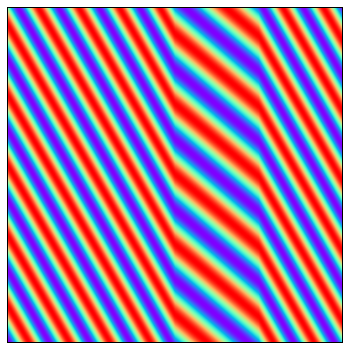

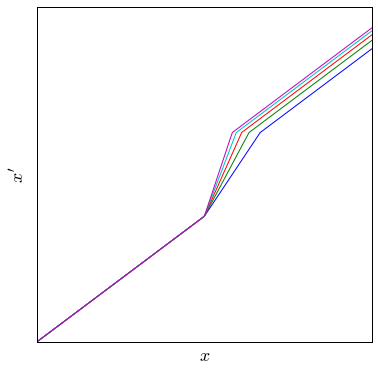

In [50]:
%pylab inline

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


k = 10.0
theta = 1.0*np.pi/6
k_x, k_y = k*np.cos(theta), k*np.sin(theta)
x = y = np.linspace(-3.0, 3.0, 400)
X, Y = np.meshgrid(x, y)

s_x = 1.0/(2.0+0.0j)

a = 1.5
X = (X<=0.0)*X + (X>0.0)*(X<=a)*(s_x*X) + (X>a)*(X-a+s_x*a)

Z = np.real(np.exp(-1j*(k_x*X + k_y*Y)))

figsize(6, 6)

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.rainbow,
                origin='lower', extent=[-3,3,-3,3],
                vmax=abs(Z).max(), vmin=-abs(Z).max())


gca().get_xaxis().set_visible(False)
gca().get_yaxis().set_visible(False)


import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'test')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

file_name = os.path.join(dir_name, 'TrOp'+file_ext)
savefig(file_name)

show()


figsize(6, 6)

N_f = 5
s_x_arr = np.linspace(2.0, 4.0, N_f)
d_xp = 2.0
for i in range(N_f):
    s_x = s_x_arr[i]
    a = d_xp/s_x
    x_p = (x<=0.0)*x + (x>0.0)*(x<=a)*(s_x*x) + (x>a)*(x-a+s_x*a)
    plot(x, x_p)


#gca().get_xaxis().set_visible(False)
#gca().get_yaxis().set_visible(False)
tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelleft='off') 

xlabel('$x$')
ylabel("$x'$")

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)


file_name = os.path.join(dir_name, 'x-xp'+file_ext)
savefig(file_name)

show()


#### Dispersion

In [47]:

from Electromagnetics.VectorCalculus import *

from sympy import Symbol, symbols, latex, atan, eye, Heaviside, sqrt, diag, Matrix, exp, I, \
            poly_from_expr, collect, Wild, zeros
from IPython.display import display, Math

from Electromagnetics.Misc import SymMatrixdoit, SymMatrixSimplify, SymMatrixsubs

x, y, z, t = symbols('x y z t')
Ex = Symbol('E_{x}')
Ey = Symbol('E_{y}')
Ez = Symbol('E_{z}')

k0, k0x, k0y, k0z = symbols('k_0 k_{0x} k_{0y} k_{0z}')
k, kx, ky, kz = symbols('k k_{x} k_{y} k_{z}')
omega = Symbol('\\omega')

eps_0, mu_0, eta_0 = symbols('\\epsilon_0 \\mu_0 \\eta_0')

isTM = True
isTE = False
assert not(isTE and isTM)

k_vec = Matrix([kx, ky, kz])

if isTM or isTE:
    k_vec = k_vec.subs([(kz, 0)])
    
r_vec = [x, y, z]

E = Matrix([[Ex, Ey, Ez]])*exp(-I*dotproduct(k_vec, r_vec))

if isTM:
    SymMatrixsubs(E, ([(Ex, 0), (Ey, 0)]))
elif isTE:
    SymMatrixsubs(E, ([(Ez, 0)]))

display(Math('E = ' + latex(E)))

s_x = symbols('s_x')
mu_r_2_mat = diag(s_x, 1/s_x, 1/s_x)
eps_r_2_mat = diag(s_x, 1/s_x, 1/s_x)

H = -1/(I*omega*mu_0)*mu_r_2_mat**(-1)*curl_r(E).T
H = H.T
SymMatrixdoit(H)
SymMatrixSimplify(H)
display(Math('H = ' + latex(H.T)))

Wave_EQ = curl_r(H).T - I*omega*eps_0*eps_r_2_mat*E.T
Wave_EQ = Wave_EQ.T
SymMatrixdoit(Wave_EQ)
SymMatrixSimplify(Wave_EQ)
display(Math('\\text{Wave EQ :} ' + latex(Wave_EQ.T)))

SymMatrixsubs(Wave_EQ, ([(x, 0), (y, 0), (z,0)]))

#poly_from_expr(Wave_EQ[0], [Ex, Ey, Ez])[0].coeffs()
#collect(Wave_EQ[0], Ex)

Wave_EQ[0] = Wave_EQ*diag(omega*mu_0/(I*s_x), omega*mu_0*s_x/I, -omega*mu_0*s_x/I) 
SymMatrixSimplify(Wave_EQ)
display(Math('\\text{Wave EQ :} ' + latex(Wave_EQ.T)))

v = [Ex, Ey, Ez]
coeffs = zeros(3, 3)
for i in range(3):
    for j in range(3):
        c = Wave_EQ[i]
        for k in range(3):
            if k!=j:
                c = c.subs(v[k], 0)
            else:
                c = c.subs(v[k], 1)
        coeffs[i, j] = c
        
display(Math('\\text{coeffs :} ' + latex(coeffs)))

SymMatrixsubs(coeffs, ([(omega**2*mu_0*eps_0, k0**2)]))
display(Math('\\text{coeffs :} ' + latex(coeffs)))

print(latex(coeffs))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

\left[\begin{matrix}0 & 0 & 0\\0 & 0 & 0\\0 & 0 & k_{0}^{2} - k_{{x}}^{2} s_{x}^{2} - k_{{y}}^{2}\end{matrix}\right]
